In [210]:
from matplotlib import pyplot as plt

import numpy as np

import pandas as pd

import scipy.special
import scipy.stats

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline

In [2]:
np.random.seed(123)

## inspeect data

In [3]:
%%time 

data = pd.read_csv("../../../data/data.csv", parse_dates=["date_time"])

CPU times: user 37.3 s, sys: 9.02 s, total: 46.4 s
Wall time: 46.4 s


In [4]:
## data for linear model
#data = all_data[
#    ["date_time", "zone_id", "banner_id", "campaign_clicks", "os_id", "country_id", "impressions", "clicks"]
#]

In [5]:
data.head()

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks
0,2021-09-27 00:01:30,0,0,5664530014561852622,0,0,0,1240,0.067,0.035016,-7.268846,0,0.010,0.049516,-5.369901,1,1
1,2021-09-26 22:54:49,1,1,5186611064559013950,0,0,1,1,0.002,0.054298,-2.657477,269,0.004,0.031942,-4.449220,1,1
2,2021-09-26 23:57:20,2,2,2215519569292448030,3,0,0,2,0.014,0.014096,-3.824875,21,0.014,0.014906,-3.939309,1,1
3,2021-09-27 00:04:30,3,3,6262169206735077204,0,1,1,3,0.012,0.015232,-3.461357,99,0.006,0.050671,-3.418403,1,1
4,2021-09-27 00:06:21,4,4,4778985830203613115,0,1,0,4,0.019,0.051265,-4.009026,11464230,6.790,0.032005,-2.828797,1,1


In [6]:
data.describe()

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks
count,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582147e+07,1.582140e+07,1.582140e+07,1.582140e+07,1.582147e+07,1.580173e+07,1.580173e+07,1.580173e+07,15821472.0,1.582147e+07
mean,8.152679e+01,3.816483e+02,4.610505e+18,6.238540e-01,1.840605e+00,4.346986e+00,6.571314e+05,1.969248e-01,7.440764e-01,-3.979590e+00,2.605069e+06,1.415899e+00,5.485722e-01,-3.968883e+00,1.0,2.668835e-02
std,1.632448e+02,3.959386e+02,2.663858e+18,9.249152e+00,1.530005e+00,4.317701e+00,2.606008e+06,2.733440e+00,1.670358e+01,1.143982e+00,5.230253e+06,8.689053e+00,1.419136e+01,1.186403e+00,0.0,1.611710e-01
min,0.000000e+00,0.000000e+00,1.116911e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.763740e-02,-8.588970e+00,0.000000e+00,0.000000e+00,-6.983897e-02,-9.562188e+00,1.0,0.000000e+00
25%,1.400000e+01,5.200000e+01,2.297977e+18,0.000000e+00,1.000000e+00,0.000000e+00,7.300000e+01,5.000000e-03,1.643856e-02,-4.515871e+00,9.900000e+01,4.000000e-03,1.615219e-02,-4.529519e+00,1.0,0.000000e+00
50%,1.900000e+01,2.170000e+02,4.614236e+18,0.000000e+00,2.000000e+00,4.000000e+00,3.030000e+02,1.000000e-02,3.539307e-02,-3.921164e+00,4.600000e+02,1.400000e-02,3.556666e-02,-3.928674e+00,1.0,0.000000e+00
75%,6.000000e+01,6.110000e+02,6.914243e+18,0.000000e+00,3.000000e+00,7.000000e+00,7.200000e+02,3.000000e-02,8.022935e-02,-3.421280e+00,1.236000e+03,5.000000e-02,7.546751e-02,-3.390867e+00,1.0,0.000000e+00
max,3.443000e+03,1.632000e+03,9.223371e+18,8.290000e+02,1.000000e+01,1.600000e+01,1.146423e+07,1.000000e+02,6.910888e+02,3.149981e-01,1.462360e+07,1.000000e+02,6.910885e+02,4.756181e-01,1.0,1.000000e+00


In [7]:
data.date_time.min(), data.date_time.max()

(Timestamp('2021-09-01 00:02:49'), Timestamp('2021-10-02 23:59:59'))

## Extract day

In [8]:
data["day"] = (data.date_time - pd.datetime(2021,9,1)).dt.days

/home/ifled/tmpdir/ipykernel_959148/813304573.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data["day"] = (data.date_time - pd.datetime(2021,9,1)).dt.days


In [9]:
data.head()

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks,day
0,2021-09-27 00:01:30,0,0,5664530014561852622,0,0,0,1240,0.067,0.035016,-7.268846,0,0.010,0.049516,-5.369901,1,1,26
1,2021-09-26 22:54:49,1,1,5186611064559013950,0,0,1,1,0.002,0.054298,-2.657477,269,0.004,0.031942,-4.449220,1,1,25
2,2021-09-26 23:57:20,2,2,2215519569292448030,3,0,0,2,0.014,0.014096,-3.824875,21,0.014,0.014906,-3.939309,1,1,25
3,2021-09-27 00:04:30,3,3,6262169206735077204,0,1,1,3,0.012,0.015232,-3.461357,99,0.006,0.050671,-3.418403,1,1,26
4,2021-09-27 00:06:21,4,4,4778985830203613115,0,1,0,4,0.019,0.051265,-4.009026,11464230,6.790,0.032005,-2.828797,1,1,26


In [10]:
data.day.min(), data.day.max()

(0, 31)

<AxesSubplot:>

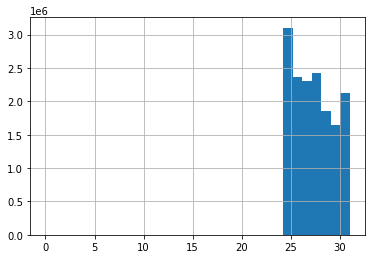

In [11]:
data.day.hist(bins=32)

<AxesSubplot:>

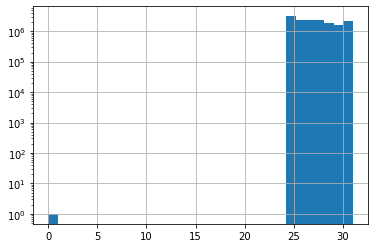

In [12]:
data.day.hist(bins=32, log=True)

In [13]:
data.day.describe()

count    1.582147e+07
mean     2.769505e+01
std      2.039576e+00
min      0.000000e+00
25%      2.600000e+01
50%      2.800000e+01
75%      2.900000e+01
max      3.100000e+01
Name: day, dtype: float64

## There is one outlier:

In [14]:
data[data.day <= 24]

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks,day
1390198,2021-09-01 00:02:49,30,596,5236744527665721365,0,0,7,596,0.05,0.06456,-4.312062,603,0.05,0.05651,-4.370191,1,0,0


## Remove the outlier

In [15]:
data.drop(data[data.day <= 24].index, inplace=True)

In [16]:
data.date_time.min(), data.date_time.max(), data.day.min(), data.day.max()

(Timestamp('2021-09-26 00:00:00'), Timestamp('2021-10-02 23:59:59'), 25, 31)

In [17]:
data.day -= 25

<AxesSubplot:>

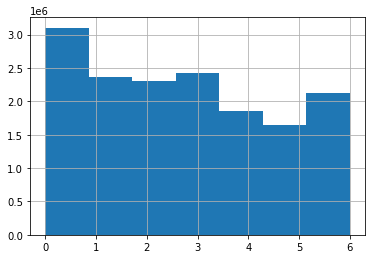

In [18]:
data.day.hist(bins=7)

In [19]:
categorical_columns = ["zone_id", "banner_id", "os_id", "country_id"]

In [20]:
for colname in categorical_columns:
    print(colname, data[colname].min(), data[colname].max())
    data[colname] = data[colname].astype(
        pd.api.types.CategoricalDtype(range(data[colname].max() - data[colname].min() + 1))
    )

zone_id 0 3443
banner_id 0 1632
os_id 0 10
country_id 0 16


In [21]:
data.describe(include='all')

/home/ifled/tmpdir/ipykernel_959148/1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks,day
count,15821471,15821471.0,15821471.0,1.582147e+07,1.582147e+07,15821471.0,15821471.0,1.582147e+07,1.582140e+07,1.582140e+07,1.582140e+07,1.582147e+07,1.580173e+07,1.580173e+07,1.580173e+07,15821471.0,1.582147e+07,1.582147e+07
unique,604711,3444.0,1633.0,NaN,NaN,11.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-09-29 19:14:40,17.0,22.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,140,2280422.0,613367.0,NaN,NaN,4589979.0,4956393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2021-09-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-10-02 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.610505e+18,6.238540e-01,NaN,NaN,6.571315e+05,1.969248e-01,7.440765e-01,-3.979590e+00,2.605069e+06,1.415899e+00,5.485722e-01,-3.968883e+00,1.0,2.668835e-02,2.695049e+00
std,NaN,NaN,NaN,2.663858e+18,9.249152e+00,NaN,NaN,2.606008e+06,2.733441e+00,1.670358e+01,1.143982e+00,5.230253e+06,8.689053e+00,1.419136e+01,1.186403e+00,0.0,1.611710e-01,2.039565e+00
min,NaN,NaN,NaN,1.116911e+12,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,-1.763740e-02,-8.588970e+00,0.000000e+00,0.000000e+00,-6.983897e-02,-9.562188e+00,1.0,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,2.297977e+18,0.000000e+00,NaN,NaN,7.300000e+01,5.000000e-03,1.643856e-02,-4.515871e+00,9.900000e+01,4.000000e-03,1.615219e-02,-4.529519e+00,1.0,0.000000e+00,1.000000e+00


## train dev test split

In [22]:
train = data[data.day <= 4]
dev = data[data.day == 5]
test = data[data.day == 6]
test_feats = test.drop("clicks", axis='columns')

len(train), len(dev), len(test), len(test_feats)

(12049045, 1643448, 2128978, 2128978)

In [23]:
test_feats.columns

Index(['date_time', 'zone_id', 'banner_id', 'oaid_hash', 'campaign_clicks',
       'os_id', 'country_id', 'banner_id0', 'rate0', 'g0', 'coeff_sum0',
       'banner_id1', 'rate1', 'g1', 'coeff_sum1', 'impressions', 'day'],
      dtype='object')

## Prepare baseline

In [24]:
train.clicks.mean(), dev.clicks.mean()

(0.02308797087238034, 0.04180174851896744)

## Predict constant learned from train

In [25]:
metrics.log_loss(dev.clicks, [0.02308797087238034] * len(dev))

0.17990976856673876

In [26]:
metrics.log_loss(test.clicks, [0.02308797087238034] * len(test))

0.15592795520192157

## Predict constant learned from dev

In [27]:
metrics.log_loss(dev.clicks, [0.04180174851896744] * len(dev))

0.1736285268660261

In [28]:
metrics.log_loss(test.clicks, [0.04180174851896744] * len(test))

0.15357188282131304

## Apply logistic regression with liblinear optimizer for 'zone_id', 'banner_id', 'os_id', 'country_id'

Will not use model with interactions because it has almost same quality

In [29]:
categorical_columns

['zone_id', 'banner_id', 'os_id', 'country_id']

In [30]:
X_train_cat = train[categorical_columns].to_numpy()

In [31]:
ohe = preprocessing.OneHotEncoder(categories=[range(3444), range(1633), range(11), range(17)])

In [32]:
ohe.fit(X_train_cat)

OneHotEncoder(categories=[range(0, 3444), range(0, 1633), range(0, 11),
                          range(0, 17)])

In [33]:
X_train = ohe.transform(X_train_cat)

In [34]:
X_train.shape

(12049045, 5105)

In [35]:
model = linear_model.LogisticRegression(solver='liblinear')

In [36]:
shuffled_train_idxs = list(range(len(train)))
np.random.shuffle(shuffled_train_idxs)

In [37]:
%%time
model.fit(X_train[shuffled_train_idxs[:2000000]], train.clicks.to_numpy()[shuffled_train_idxs[:2000000]])

CPU times: user 1min 12s, sys: 3.84 s, total: 1min 16s
Wall time: 28.9 s


LogisticRegression(solver='liblinear')

In [38]:
X_dev = ohe.transform(dev[categorical_columns].to_numpy())

In [39]:
%%time
dev_predict = model.predict_proba(X_dev)

CPU times: user 80 ms, sys: 4 ms, total: 84 ms
Wall time: 82.5 ms


In [40]:
metrics.log_loss(dev.clicks, dev_predict)

0.15287545717148104

In [41]:
X_test = ohe.transform(test_feats[categorical_columns].to_numpy())
test_predict = model.predict_proba(X_test)
metrics.log_loss(test.clicks, test_predict)

0.13597807111968535

## Filter test data

### Remove also data with banners_id1 > 1632 (hope I'll fix it later)

In [64]:
test.shape, test_feats.shape

((2128978, 18), (2128978, 17))

In [127]:
((test.banner_id == test.banner_id0) & (test.banner_id1 > 1632)).sum()

462433

<AxesSubplot:>

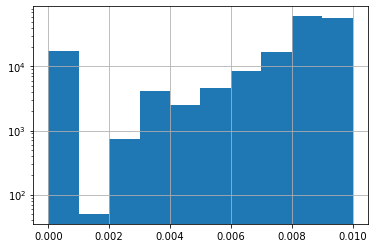

In [135]:
test[test.g0 < 0.01].g0.hist(log=True)

In [133]:
(test.g0 < 0.001).sum()

17352

In [134]:
(test.g1 < 0.001).sum()

32539

In [149]:
filtered_test = test[
    (test.banner_id == test.banner_id0) & (test.banner_id1 <= 1632) & (test.g0 >= 0.001) & (test.g1 >= 0.001)
]
banner_0_feats = filtered_test[categorical_columns]
banner_1_feats = filtered_test[categorical_columns].copy()
banner_1_feats.banner_id = filtered_test.banner_id1

In [150]:
filtered_test.shape, banner_0_feats.shape, banner_1_feats.shape

((1428059, 18), (1428059, 4), (1428059, 4))

In [151]:
filtered_test.head()

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks,day
164,2021-10-02 00:01:07,8,76,8008530729166508034,0,1,3,76,0.008,0.055551,-2.926980,401,0.003,0.030272,-3.390642,1,1,6
169,2021-10-02 00:04:12,14,46,5180296235094691109,0,0,0,46,0.004,0.017439,-2.493974,0,0.010,0.017624,-3.889516,1,1,6
359,2021-10-02 00:01:09,14,2,4843044827996727497,0,0,0,2,0.014,0.020414,-2.154111,49,0.014,0.068041,-3.088063,1,1,6
361,2021-10-02 00:02:34,55,131,7553975436848867369,0,1,7,131,0.001,0.234356,-3.850595,78,0.001,0.230436,-3.866019,1,1,6
362,2021-10-02 00:03:24,86,84,2874462738663473300,0,3,0,84,0.001,0.065159,-2.982837,149,0.001,0.136913,-3.271700,1,1,6


In [152]:
banner_0_feats.head()

,zone_id,banner_id,os_id,country_id
164,8,76,1,3
169,14,46,0,0
359,14,2,0,0
361,55,131,1,7
362,86,84,3,0


In [153]:
banner_1_feats.head()

,zone_id,banner_id,os_id,country_id
164,8,401,1,3
169,14,0,0,0
359,14,49,0,0
361,55,78,1,7
362,86,149,3,0


## Prepare coeff_sum0_new and coeff_sum_1_new

In [163]:
coeff_sum0_new_proba = model.predict_proba(ohe.transform(banner_0_feats.to_numpy()))
coeff_sum1_new_proba = model.predict_proba(ohe.transform(banner_1_feats.to_numpy()))

In [164]:
coeff_sum0_new_proba[:10]

array([[0.95908758, 0.04091242],
       [0.92947218, 0.07052782],
       [0.92658183, 0.07341817],
       [0.99094934, 0.00905066],
       [0.95325156, 0.04674844],
       [0.92947218, 0.07052782],
       [0.92947218, 0.07052782],
       [0.85471713, 0.14528287],
       [0.96087574, 0.03912426],
       [0.92495106, 0.07504894]])

In [165]:
coeff_sum1_new_proba[:10]

array([[0.97338641, 0.02661359],
       [0.95144105, 0.04855895],
       [0.93316422, 0.06683578],
       [0.99001454, 0.00998546],
       [0.96711891, 0.03288109],
       [0.95144105, 0.04855895],
       [0.95144105, 0.04855895],
       [0.86051013, 0.13948987],
       [0.95774518, 0.04225482],
       [0.92012207, 0.07987793]])

In [167]:
coeff_sum0_new = scipy.special.logit(coeff_sum0_new_proba[:, 1])
coeff_sum1_new = scipy.special.logit(coeff_sum1_new_proba[:, 1])

In [168]:
coeff_sum0_new[:10]

array([-3.15454874, -2.57860964, -2.53533091, -4.69582577, -3.01509793,
       -2.57860964, -2.57860964, -1.77208791, -3.20110244, -2.51160042])

In [169]:
coeff_sum1_new[:10]

array([-3.59935924, -2.97519918, -2.63634263, -4.59658944, -3.38142389,
       -2.97519918, -2.97519918, -1.81953342, -3.12086344, -2.44400675])

## Calc policies

In [170]:
def calc_policy(coeff_sum0, coeff_sum1, g0, g1):
    return scipy.stats.norm.cdf(0, loc=coeff_sum1 - coeff_sum0, scale=(g0**2 + g1**2)**0.5)

In [233]:
p0 = calc_policy(
    filtered_test.coeff_sum0, filtered_test.coeff_sum1,
    filtered_test.g0, filtered_test.g1
)
p0 = pd.DataFrame(p0, index=filtered_test.index, columns=['old p'])

In [234]:
p1 = calc_policy(
    coeff_sum0_new, coeff_sum1_new,
    filtered_test.g0, filtered_test.g1
)
p1 = pd.DataFrame(p1, index=filtered_test.index, columns=['new p'])

### Sanity check

In [235]:
pd.concat(
    [
        pd.DataFrame(
            filtered_test.coeff_sum0 - filtered_test.coeff_sum1,
            index=filtered_test.index,
            columns=['old sum0 - sum1']
        ),
        p0
    ],
    axis=1
)[:10]

,old sum0 - sum1,old p
164,0.463663,1.000000
169,1.395542,1.000000
359,0.933951,1.000000
361,0.015425,0.518716
362,0.288863,0.971615
363,1.395542,1.000000
433,1.395542,1.000000
438,1.115192,1.000000
439,0.210941,0.981799
440,0.207294,1.000000


In [236]:
pd.concat(
    [
        pd.DataFrame(coeff_sum0_new - coeff_sum1_new, index=filtered_test.index, columns=['new sum0 - sum1']),
        p1
    ],
    axis=1
)[:10]

,new sum0 - sum1,new p
164,0.444811,1.000000
169,0.396590,1.000000
359,0.101012,0.922480
361,-0.099236,0.381351
362,0.366326,0.992153
363,0.396590,1.000000
433,0.396590,1.000000
438,0.047446,0.646642
439,-0.080239,0.213038
440,-0.067594,0.023292


## Calculate clipped ips

In [237]:
p0.min()

old p    0.0
dtype: float64

In [238]:
(p0 <= 0).sum()

old p    8821
dtype: int64

(array([ 99510.,  31919.,  44466.,  67039., 222152., 264788.,  90353.,
         76079.,  77175., 445757.]),
 array([6.114097e-311, 1.000000e-001, 2.000000e-001, 3.000000e-001,
        4.000000e-001, 5.000000e-001, 6.000000e-001, 7.000000e-001,
        8.000000e-001, 9.000000e-001, 1.000000e+000]),
 <BarContainer object of 10 artists>)

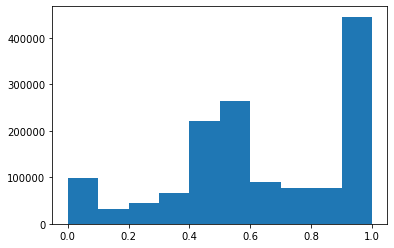

In [239]:
plt.hist(p0[p0 > 0])

(array([70249.,  4338.,  3684.,  3287.,  3126.,  3159.,  2856.,  2897.,
         2900.,  3014.]),
 array([6.11409700e-311, 9.99994471e-003, 1.99998894e-002, 2.99998341e-002,
        3.99997788e-002, 4.99997235e-002, 5.99996683e-002, 6.99996130e-002,
        7.99995577e-002, 8.99995024e-002, 9.99994471e-002]),
 <BarContainer object of 10 artists>)

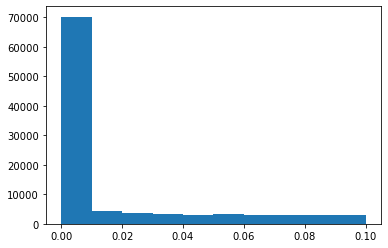

In [240]:
plt.hist(p0[(0.1 > p0) & (p0 > 0)])

(array([  470.,   360.,   292.,   306.,   425.,   682.,  1675.,  1702.,
         9521., 84077.]),
 array([-714.29336683, -643.09428921, -571.89521159, -500.69613397,
        -429.49705635, -358.29797873, -287.09890111, -215.89982349,
        -144.70074586,  -73.50166824,   -2.30259062]),
 <BarContainer object of 10 artists>)

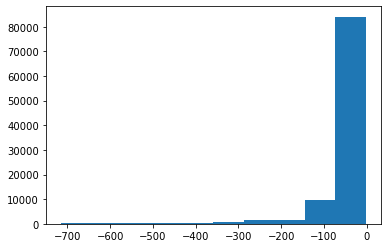

In [241]:
plt.hist(np.log(p0[(0.1 > p0) & (p0 > 0)]))

In [242]:
lmbd = 10

In [266]:
%%time

good_indices = p0["old p"] > 0

cips_terms = filtered_test[good_indices].clicks * np.minimum(p1[good_indices]["new p"] / p0[good_indices]["old p"], lmbd)

CPU times: user 156 ms, sys: 52 ms, total: 208 ms
Wall time: 187 ms


In [268]:
cips_terms.head()

164    1.000000
169    1.000000
359    0.922480
361    0.735183
362    1.021138
dtype: float64

In [295]:
pd.concat([
        pd.DataFrame(cips_terms, index=filtered_test[good_indices].index),
        p0[good_indices],
        p1[good_indices],
        filtered_test.clicks,
    ],
    axis=1
).set_axis(['cips', 'p0', 'p1', 'clicks'], axis=1)[:10]

,cips,p0,p1,clicks
164,1.000000,1.000000,1.000000,1
169,1.000000,1.000000,1.000000,1
359,0.922480,1.000000,0.922480,1
361,0.735183,0.518716,0.381351,1
362,1.021138,0.971615,0.992153,1
363,1.000000,1.000000,1.000000,1
433,1.000000,1.000000,1.000000,1
438,0.646642,1.000000,0.646642,1
439,0.216987,0.981799,0.213038,1
440,0.023292,1.000000,0.023292,1


In [296]:
pd.concat([
        pd.DataFrame(cips_terms, index=filtered_test[good_indices].index),
        p0[good_indices],
        p1[good_indices],
        filtered_test.clicks,
    ],
    axis=1
).set_axis(['cips', 'p0', 'p1', 'clicks'], axis=1)[1000000:1000010]

,cips,p0,p1,clicks
11054436,0.0,7.483623e-01,8.067761e-04,0
11054437,0.0,4.838684e-01,4.202504e-01,0
11054445,0.0,9.724561e-01,7.414661e-07,0
11054462,0.0,7.586417e-01,9.999170e-01,0
11054486,0.0,7.985453e-01,6.588225e-01,0
11054492,0.0,1.907057e-01,3.761802e-01,0
11054507,0.0,4.733005e-01,9.987554e-01,0
11054520,0.0,1.000000e+00,1.000000e+00,0
11054532,0.0,7.416958e-34,6.078545e-07,0
11054543,0.0,2.213812e-01,7.338532e-01,0


## CIPS value

In [300]:
cips_terms.mean()

0.04042790840794313

In [301]:
filtered_test[good_indices].clicks.mean()

0.03484827773777196